# Problem Statement

Implemented gradient descent from scratch using n-dimensional data.

In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from IPython.display import Image

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Dataset Description

In [2]:
df = pd.read_csv('/kaggle/input/advertising-sales-dataset/Advertising Budget and Sales.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [6]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
df.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Data Visualization

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


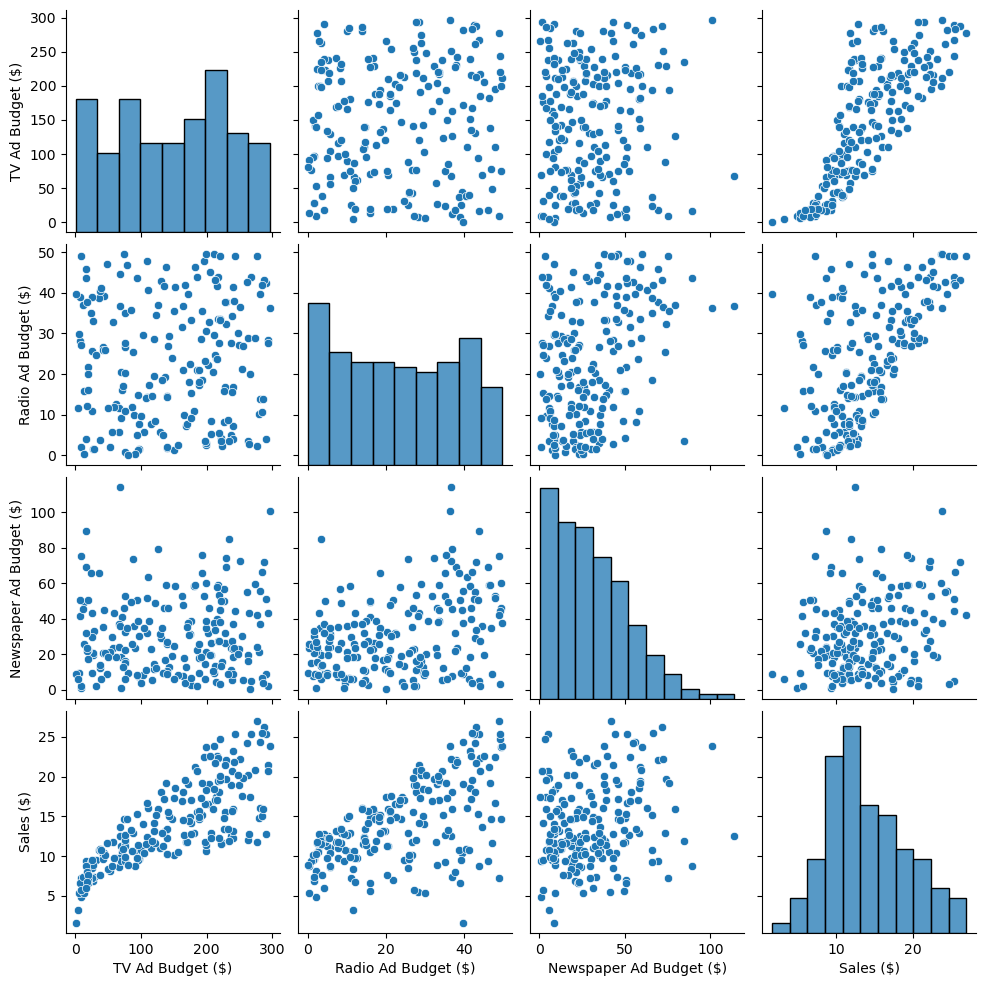

In [8]:
sns.pairplot(df)

# Train-Test Split

In [9]:
X = df.drop(['Sales ($)'], axis = 1)
y = df['Sales ($)']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8, shuffle = True)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression From Sklearn

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
r2_score(y_test, regressor.predict(X_test))

0.8854571881271273

In [13]:
regressor.intercept_

13.494999999999997

In [14]:
regressor.coef_

array([ 3.90074904,  2.69243055, -0.07674422])

We have 3 features in our dataset, hence we will have 3 coefficients and 1 intercept.  
Refer the below image to understand the matrix representation of the code.

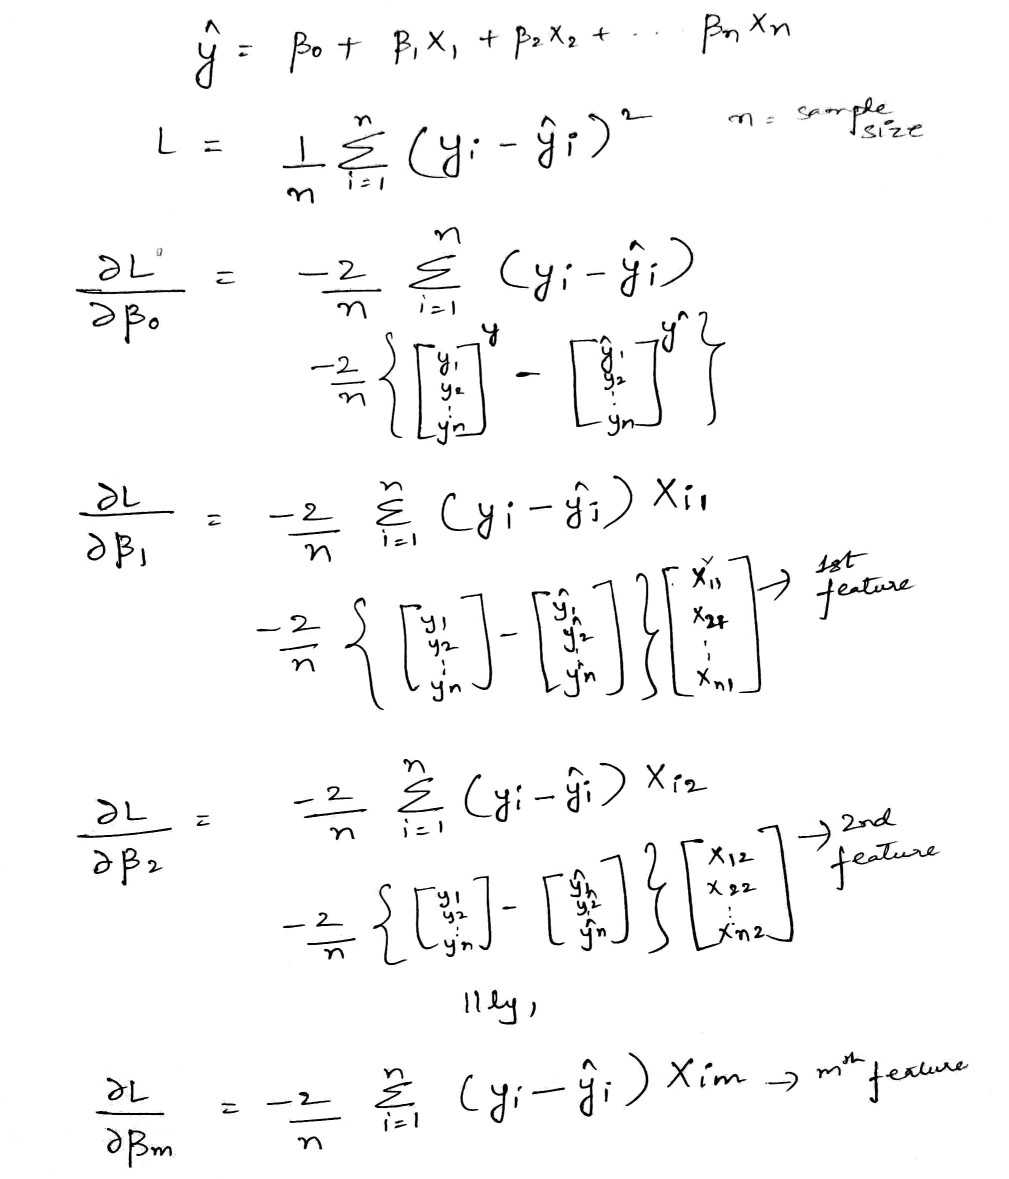

In [15]:
Image('/kaggle/input/images-gd1/matrix_representation.jpg')

# Gradient Descent in N dimension

In [16]:
class GDRegressor:
    def __init__(self, epochs, learning_rate):
        self.intercept = None
        self.coefs = None
        self.epochs = epochs
        self.lr = learning_rate
        
    def fit(self, X_train, y_train):
        self.intercept = 0
        self.coefs = np.ones(X_train.shape[1])
        for i in range(self.epochs):
            y_pred = self.intercept + np.dot(X_train, self.coefs)
            
            intercept_der = -2 * np.mean(y_train - y_pred) #intercept derivative
            self.intercept = self.intercept - (self.lr * intercept_der)
            
            #we are calculating all the derivates at once using matrix mutilplication
            coefs_der = -2 * np.dot((y_train - y_pred), X_train)/X_train.shape[0] #coefs derivatives
            
            self.coefs = self.coefs - (self.lr * coefs_der)
        return self.intercept, self.coefs
        
    def predict(self, X_test):
        return np.dot(X_test,self.coefs) + self.intercept

In [17]:
gd = GDRegressor(110, 0.1)
intercept, coefs = gd.fit(X_train, y_train)
intercept, coefs

(13.494999999704829, array([ 3.90074906,  2.69242939, -0.07674306]))

In [18]:
r2_score(y_test, gd.predict(X_test))

0.8854571814073633